# Masters Report

This is the working notebook used to generate the data and images for my Masters Thesis.

In [1]:
import analysis.core as core
import analysis.fom as fom
import numpy as np
import matplotlib.pyplot as plt
import cPickle
import pandas as pd
import re
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


In [2]:
def plot_setup(xlabel, ylabel, title, font=12):
    plt.figure(figsize=(12, 9))
    ax = plt.subplot(111)  
    #ax.spines["top"].set_visible(False)  
    #ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()
    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.ylabel(ylabel,fontsize=font)
    plt.xlabel(xlabel,fontsize=font)
    plt.title(title, y=1.08, fontsize = font)
    #plt.rc('grid', linestyle="--", color='gray')
    plt.grid('on')

# Convergence Sample Graphs

In [3]:
base = '/home/josh/downloads/scratch/pwr/S0100/'
x_pwr = [0.2]
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_pwr]
name = [str(n) for n in x_pwr]
pwr_comp = fom.Comparator(dir,name)

Uploaded 630 files.


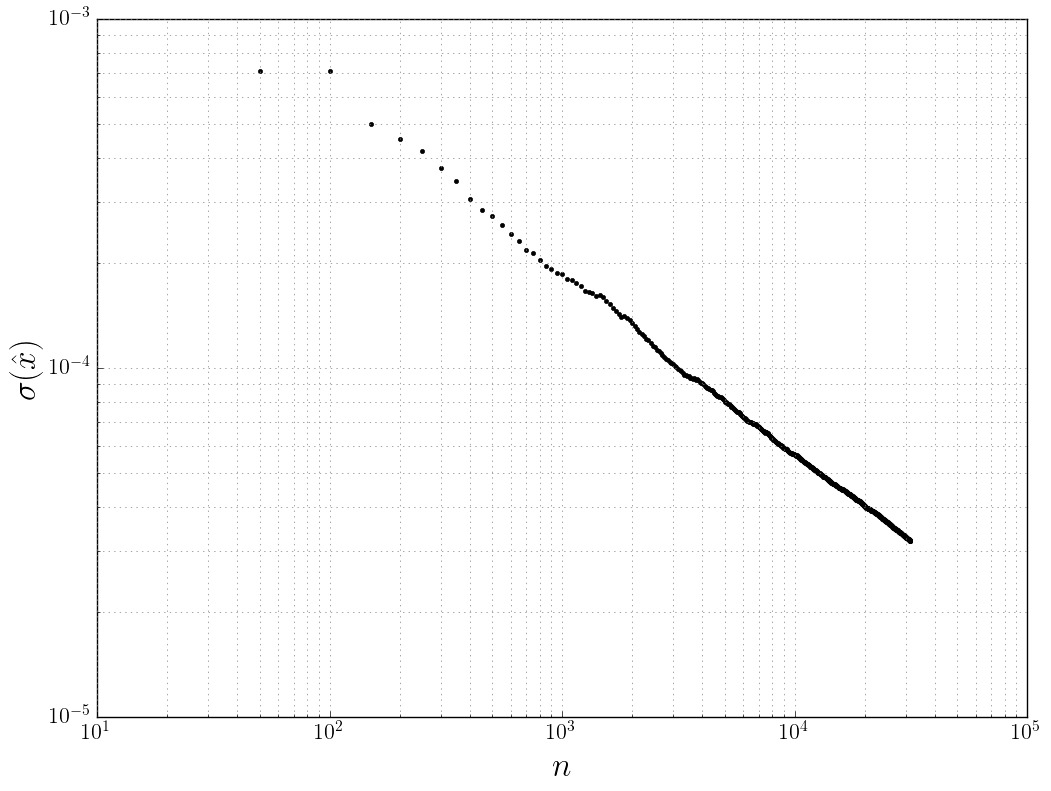

In [10]:
label = 'INF_FLX'
grp = 1
pts = 50
font_size = 16
label_size = 24
pwr_comp.plot(label, grp, fom=False)
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
ax = plt.gca()
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('$\sigma(\hat{x})$', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=3.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/error_convergence.pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

------------------_

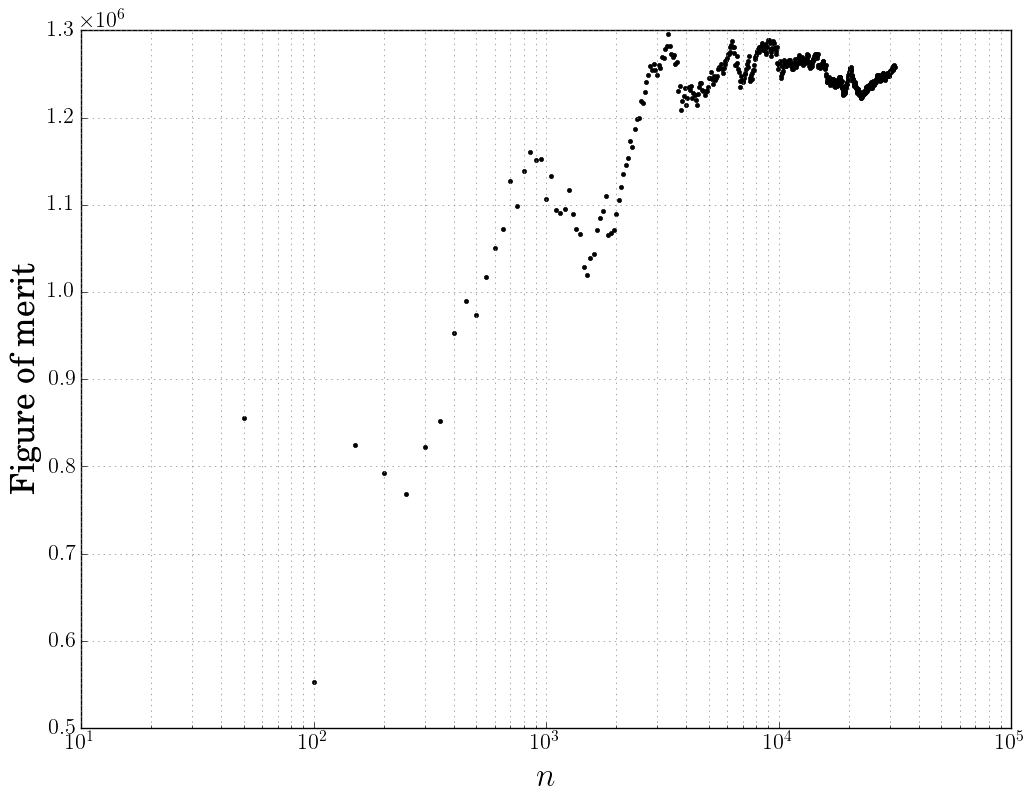

In [53]:
label = 'INF_FLX'
file_name = 'fom_convergence_example'
grp = 1
pts = 50
font_size = 16
label_size= 24
pwr_comp.plot(label, grp, fom=True)
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=3.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

---------------_
# Test case plotting

## PWR

In [26]:
base = '/home/josh/downloads/scratch/pwr/S0100/'
x_pwr = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_pwr]
name = [str(n) for n in x_pwr]
pwr_comp = fom.Comparator(dir,name)

Uploaded 1450 files.
Uploaded 630 files.
Uploaded 630 files.
Uploaded 582 files.
Uploaded 937 files.
Uploaded 911 files.
Uploaded 1058 files.
Uploaded 1410 files.
Uploaded 1002 files.
Uploaded 403 files.


In [72]:
label = 'INF_SP0'
grp = 1
n_pts = 20
r_names, ratio = pwr_comp.ratio(label,grp,n_pts)
d_names = [a.name for a in pwr_comp.data]
fom   = [a.get_avg(label,grp,n_pts) for a in pwr_comp.data]
d = {'twdt' : r_names, 'fom' : fom, 'ratio' : ratio}
df = pd.DataFrame(d)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols
df = df[cols]
print df
def fom(x):
    return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
def ratio(x):
    return '{:.6f}'.format(x)
def twdt(x):
    return x
print df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False)

  twdt           fom     ratio
0  0.1  1.467242e+07  1.000000
1  0.2  1.407526e+07  0.959300
2  0.3  1.404113e+07  0.956974
3  0.4  1.419632e+07  0.967552
4  0.5  1.155054e+07  0.787228
5  0.6  1.181301e+07  0.805117
6  0.7  1.191133e+07  0.811818
7  0.8  1.188149e+07  0.809784
8  0.9  1.212526e+07  0.826398
9  1.0  1.199368e+07  0.817430
\begin{tabular}{lrr}
\toprule
twdt &                     fom &    ratio \\
\midrule
 0.1 & 1.467242$\times 10^{7}$ & 1.000000 \\
 0.2 & 1.407526$\times 10^{7}$ & 0.959300 \\
 0.3 & 1.404113$\times 10^{7}$ & 0.956974 \\
 0.4 & 1.419632$\times 10^{7}$ & 0.967552 \\
 0.5 & 1.155054$\times 10^{7}$ & 0.787228 \\
 0.6 & 1.181301$\times 10^{7}$ & 0.805117 \\
 0.7 & 1.191133$\times 10^{7}$ & 0.811818 \\
 0.8 & 1.188149$\times 10^{7}$ & 0.809784 \\
 0.9 & 1.212526$\times 10^{7}$ & 0.826398 \\
 1.0 & 1.199368$\times 10^{7}$ & 0.817430 \\
\bottomrule
\end{tabular}



In [79]:
np.mean(df['ratio'][1:5])

0.9177636932570608

--------------_

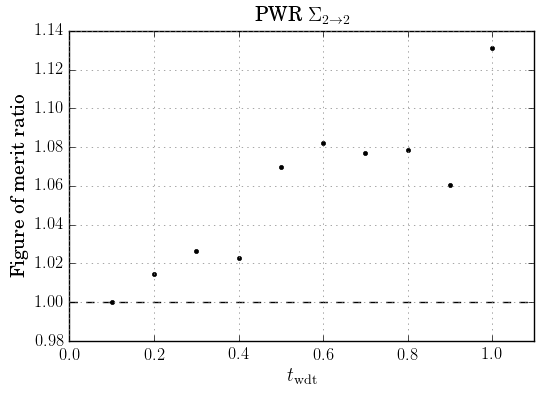

In [119]:
label = 'INF_SP0'
grp = 4
file_name = 'pwr_' + label.lower() + '_grp_' + str(grp)
n_pts = 20
names, ratio = pwr_comp.ratio(label,grp,n_pts)
#names, ratio2 = pwr_comp.ratio(label,grp+1,n_pts)
font_size = 12
label_size= 14
plt.plot(x_pwr,ratio,'ko',markersize=6, label='Group 1')
#plt.plot(x_pwr,ratio2,'kx',ms=6, mew=1.5,label='Group 2')
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
plt.xlim([0,1.1])
#plt.ylim([0.99,1.07])
plt.axhline(y=1.0, color='k',linestyle='--')
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit ratio', fontsize=label_size)
plt.xlabel('$t_{\mathrm{wdt}}$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=1.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('PWR $\Sigma_{2 \\to 2}$')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()


In [82]:
base = '/home/josh/downloads/scratch/pwr/S0100/'
x_pwr = [0.1, 0.9]
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_pwr]
name = [str(n) for n in x_pwr]
full_comp = fom.Comparator(dir,name)

Uploaded 1450 files.
Uploaded 1002 files.


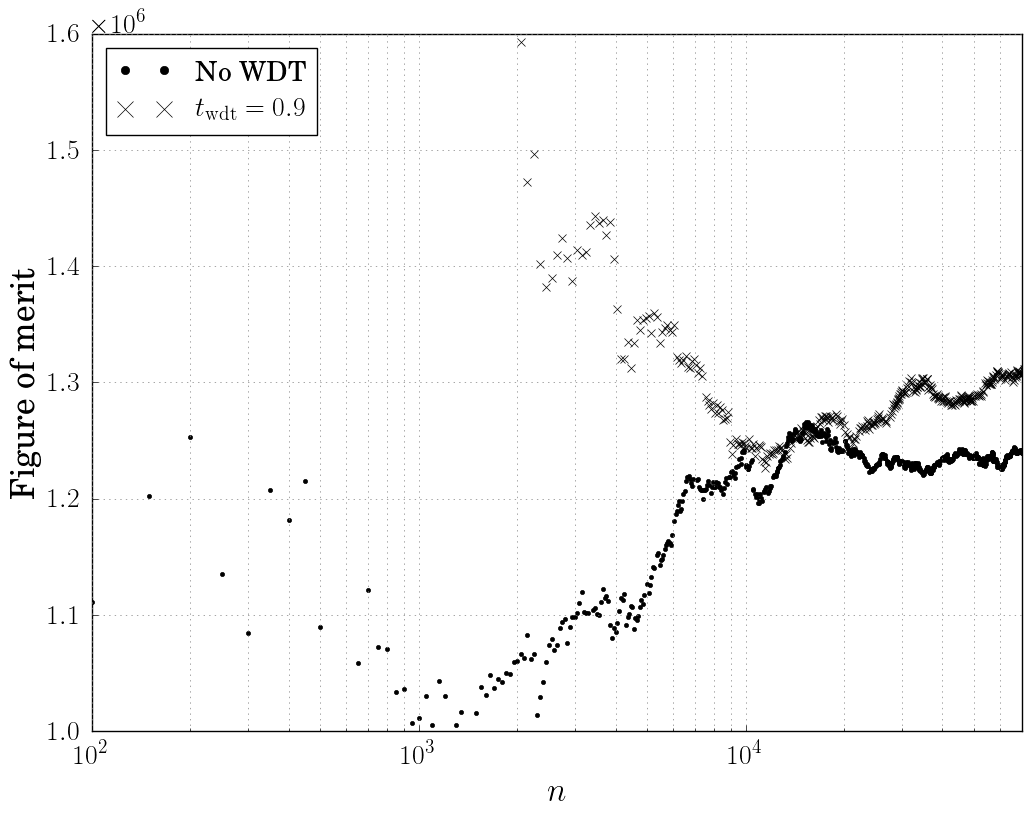

In [99]:
label = 'INF_FLX'
file_name = 'pwr_inf_flx_nowdt_09_grp1'
grp = 1
pts = 20
font_size = 20
label_size= 24
full_comp.plot(label, grp, fom=True)
plt.ylim([1e6,1.6e6])
plt.xlim([1e2,7e4])
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size, pad = 8)
ax.tick_params(axis='x', labelsize=font_size, pad = 8)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
line.set_markevery(0.2)
line = plt.gca().get_lines()[1]
line.set_marker('x') 
line.set_color('black')
line.set_markevery(0.2)
L = plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
L.get_texts()[0].set_text('No WDT')
L.get_texts()[1].set_text('$t_{\mathrm{wdt}} = 0.9$')
#L.set_visible(False)

plt.title('')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')

## Fast Pin Cell

In [3]:
base = '/home/josh/downloads/scratch/fast_pincell/S0100/'
x_fast = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_fast]
name = [str(n) for n in x_fast]
fast_comp = fom.Comparator(dir,name)

Uploaded 958 files.
Uploaded 486 files.
Uploaded 660 files.
Uploaded 465 files.
Uploaded 420 files.
Uploaded 784 files.
Uploaded 362 files.
Uploaded 366 files.
Uploaded 437 files.
Uploaded 492 files.


### Create Data Tables

In [4]:
base_dir = '/home/josh/repos/masters_thesis/include/tables/'
labels = ['INF_SP0']
grps = [1,2,3,4]
n_pts = 20

for label in labels:
    for grp in grps:
        r_names, ratio = fast_comp.ratio(label,grp,n_pts)
        d_names = [a.name for a in fast_comp.data]
        fom   = [a.get_avg(label,grp,n_pts) for a in fast_comp.data]
        d = {'$t_{\\mathrm{wdt}}$' : r_names, '$\\overline{\\mathrm{FOM}}$' : fom, 'Ratio' : ratio}
        df = pd.DataFrame(d)
        cols = df.columns.tolist()
        cols = [cols[1], cols[0], cols[2]]
        df = df[cols]
        def fom(x):
            return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
        def ratio(x):
            return '{:.6f}'.format(x)
        def twdt(x):
            return x
        file_name = 'fast_' + label.lower() + '_grp_' + str(grp) + '.tex'
        with open(base_dir + file_name,'w') as f:
            f.write(df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False))

## Create Plots

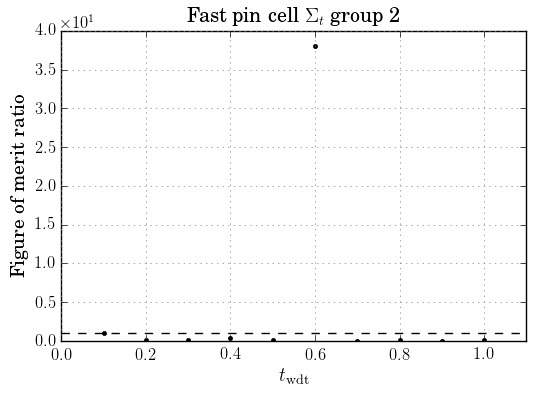

In [5]:
label = 'INF_TOT'
grp = 2
file_name = 'fast_' + label.lower() + '_grp_' + str(grp)
n_pts = 20
names, ratio = fast_comp.ratio(label,grp,n_pts)
font_size = 12
label_size= 14
plt.plot(x_fast,ratio,'ko',markersize=6, label='Group 1')
#plt.plot(x_pwr,ratio2,'kx',ms=6, mew=1.5,label='Group 2')
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
plt.xlim([0,1.1])
#plt.ylim([0.99,1.07])
plt.axhline(y=1.0, color='k',linestyle='--')
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit ratio', fontsize=label_size)
plt.xlabel('$t_{\mathrm{wdt}}$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=1.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('Fast pin cell $\Sigma_{t}$ group 2')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

In [16]:
base = '/home/josh/downloads/scratch/fast_pincell/S0100/'
x_part = [0.1, 0.6]
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_part]
name = [str(n) for n in x_part]
fast_part_comp = fom.Comparator(dir,name)

Uploaded 958 files.
Uploaded 784 files.


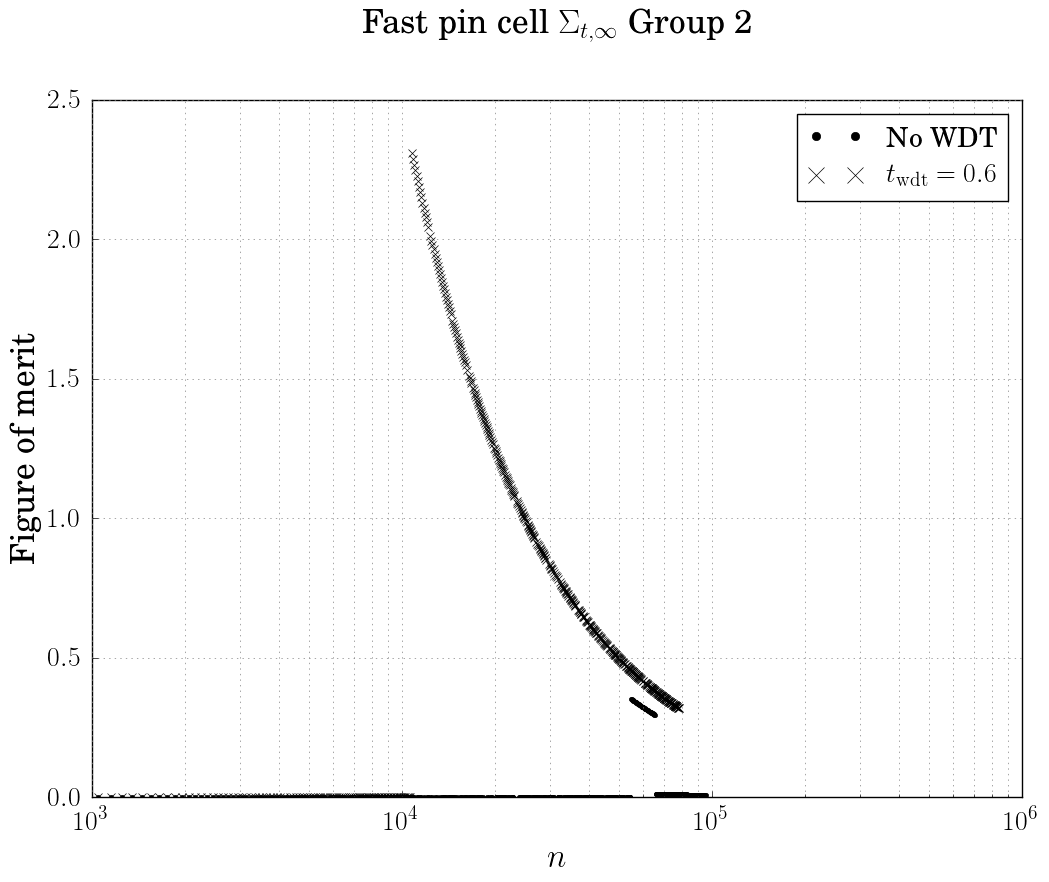

In [17]:
label = 'INF_TOT'
file_name = 'fast_inf_tot_example'
grp = 2
pts = 20
font_size = 20
label_size= 24

fast_part_comp.plot(label, grp, fom=True)

#plt.ylim([10e-1, 2e0])
plt.xlim([1e3,1e6])
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size, pad = 8)
ax.tick_params(axis='x', labelsize=font_size, pad = 8)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
line.set_markevery(0.2)
line = plt.gca().get_lines()[1]
line.set_marker('x') 
line.set_color('black')
line.set_markevery(0.2)

L = plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
L.get_texts()[0].set_text('No WDT')
L.get_texts()[1].set_text('$t_{\mathrm{wdt}} = 0.6$')
#L.set_visible(False)
plt.grid(True,which='both',color='0.5')
plt.title('Fast pin cell $\Sigma_{t,\infty}$ Group 2')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

# Homogenous Fuel Element

In [17]:
base = '/home/josh/downloads/scratch/homog/S0100/'
x_homog = np.linspace(0.1,1,10)
dir = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in x_homog]
name = [str(n) for n in x_homog]
homog_comp = fom.Comparator(dir,name)

Uploaded 569 files.
Uploaded 426 files.
Uploaded 186 files.
Uploaded 302 files.
Uploaded 583 files.
Uploaded 305 files.
Uploaded 308 files.
Uploaded 554 files.
Uploaded 423 files.
Uploaded 198 files.


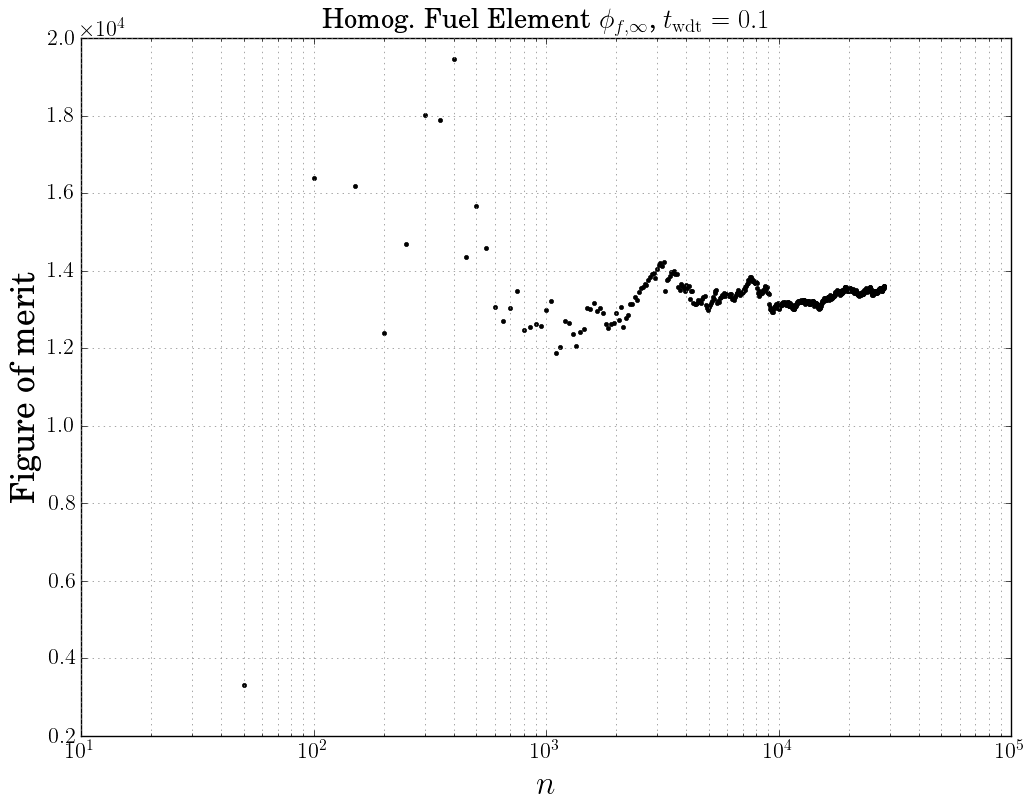

In [13]:
label = 'INF_FLX'
file_name = 'homog_fom_convergence_example'
#grps = range(1,7)
grps = range(1,7)
pts = 20
font_size = 16
label_size= 24
data = homog_comp.data[0].get_collapse(label, grps)
plt.figure(figsize=(12, 9))
plt.semilogx(data[:,0], data[:,1],'.')
#plt.axhline(homog_comp.data[0].get_collapse_avg(label,grps,pts))
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit', fontsize=label_size)
plt.xlabel('$n$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
#L = plt.legend(fontsize=font_size, loc='best',markerscale=3.0)
#L.get_texts()[0].set_text('No WDT')
#L.set_visible(False)

plt.title('Homog. Fuel Element $\phi_{f, \infty}$, $t_{\mathrm{wdt}} = 0.1$')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

## Make many tables

In [10]:
base_dir = '/home/josh/repos/masters_thesis/include/tables/homog/'
labels = ['INF_FLX']
grps = [1,2]
n_pts = 20

for label in labels:
    for grp in grps:
        r_names, ratio = homog_comp.ratio(label,grp,n_pts)
        d_names = [a.name for a in homog_comp.data]
        fom   = [a.get_avg(label,grp,n_pts) for a in homog_comp.data]
        d = {'$t_{\\mathrm{wdt}}$' : r_names, '$\\overline{\\mathrm{FOM}}$' : fom, 'Ratio' : ratio}
        df = pd.DataFrame(d)
        cols = df.columns.tolist()
        cols = [cols[1], cols[0], cols[2]]
        df = df[cols]
        def fom(x):
            return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
        def ratio(x):
            return '{:.6f}'.format(x)
        def twdt(x):
            return x
        file_name = 'homog_' + label.lower() + '_grp_' + str(grp) + '.tex'
        with open(base_dir + file_name,'w') as f:
            f.write(df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False))
    

## Inf Flux

In [3]:
base_dir = '/home/josh/repos/masters_thesis/include/tables/'
label = 'INF_SP0'
grp = 37
file_end = 'comb2'
n_pts = 20

r_names, ratio = homog_comp.ratio(label,grp,n_pts)
d_names = [a.name for a in homog_comp.data]
fom   = [a.get_avg(label,grp,n_pts) for a in homog_comp.data]
d = {'$t_{\\mathrm{wdt}}$' : r_names, '$\\overline{\\mathrm{FOM}}$' : fom, 'Ratio' : ratio}
df = pd.DataFrame(d)
cols = df.columns.tolist()
cols = [cols[1], cols[0], cols[2]]
df = df[cols]
def fom(x):
    return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
def ratio(x):
    return '{:.6f}'.format(x)
def twdt(x):
    return x

print df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False)

\begin{tabular}{lrr}
\toprule
$t_{\mathrm{wdt}}$ & $\overline{\mathrm{FOM}}$ &    Ratio \\
\midrule
               0.1 &   4.050509$\times 10^{9}$ & 1.000000 \\
               0.2 &   3.882580$\times 10^{9}$ & 0.958541 \\
               0.3 &   3.983787$\times 10^{9}$ & 0.983528 \\
               0.4 &   4.016648$\times 10^{9}$ & 0.991640 \\
               0.5 &   3.900661$\times 10^{9}$ & 0.963005 \\
               0.6 &   3.792559$\times 10^{9}$ & 0.936317 \\
               0.7 &   4.062163$\times 10^{9}$ & 1.002877 \\
               0.8 &   3.812723$\times 10^{9}$ & 0.941295 \\
               0.9 &   3.915575$\times 10^{9}$ & 0.966687 \\
               1.0 &   4.087541$\times 10^{9}$ & 1.009143 \\
\bottomrule
\end{tabular}



In [12]:
base_dir = '/home/josh/repos/masters_thesis/include/tables/'
label = 'INF_FLX'
grps = range(7,12)
file_end = 'comb2'
n_pts = 20

r_names, ratio = homog_comp.collapse_ratio(label,grps,n_pts)
d_names = [a.name for a in homog_comp.data]
fom   = [a.get_collapse_avg(label,grps,n_pts) for a in homog_comp.data]
d = {'$t_{\\mathrm{wdt}}$' : r_names, '$\\overline{\\mathrm{FOM}}$' : fom, 'Ratio' : ratio}
df = pd.DataFrame(d)
cols = df.columns.tolist()
cols = [cols[1], cols[0], cols[2]]
df = df[cols]
def fom(x):
    return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
def ratio(x):
    return '{:.6f}'.format(x)
def twdt(x):
    return x
file_name = 'homog_' + label.lower() + '_grp_' + file_end + '.tex'
with open(base_dir + file_name,'w') as f:
    f.write(df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False))

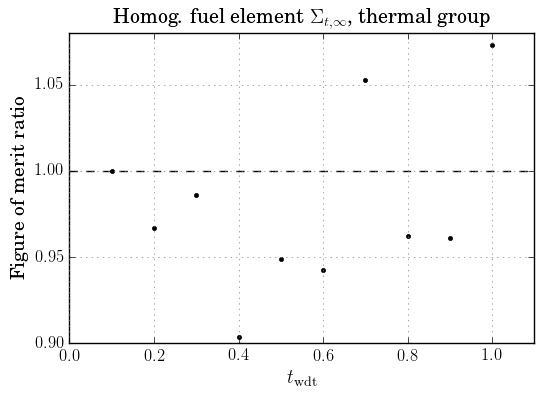

In [22]:
label = 'INF_TOT'
grps = range(7,12)
grp = 'comb2'
file_name = 'homog_' + label.lower() + '_grp_' + str(grp)
n_pts = 20
names, ratio = homog_comp.collapse_ratio(label,grps,n_pts)
#names, ratio2 = pwr_comp.ratio(label,grp+1,n_pts)
font_size = 12
label_size= 14
plt.plot(x_homog,ratio,'ko',markersize=6, label='Group 1')
#plt.plot(x_pwr,ratio2,'kx',ms=6, mew=1.5,label='Group 2')
#plt.ylim([1.5e5,2e5])
#plt.xlim([1e4,1e5])
plt.xlim([0,1.1])
#plt.ylim([0.99,1.07])
plt.axhline(y=1.0, color='k',linestyle='--')
ax = plt.gca()
plt.rc('font', size=font_size)
ax.yaxis.get_major_formatter().set_powerlimits((0, 1))
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(True)
plt.ylabel('Figure of merit ratio', fontsize=label_size)
plt.xlabel('$t_{\mathrm{wdt}}$', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)
#plt.legend(fontsize=font_size, loc='best',markerscale=2.0)
line = plt.gca().get_lines()[0]
line.set_marker('.') 
line.set_color('black')
L = plt.legend(fontsize=font_size, loc='best',markerscale=1.0)
#L.get_texts()[0].set_text('No WDT')
L.set_visible(False)

plt.title('Homog. fuel element $\Sigma_{t,\infty}$, thermal group')
plt.grid(True,which='both',color='0.5')
plt.savefig("/home/josh/repos/masters_thesis/images/results/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
plt.show()

In [26]:
n = np.array(range(1,122))
n.shape = (11,11)
print n
np.ceil(106.0/11)

[[  1   2   3   4   5   6   7   8   9  10  11]
 [ 12  13  14  15  16  17  18  19  20  21  22]
 [ 23  24  25  26  27  28  29  30  31  32  33]
 [ 34  35  36  37  38  39  40  41  42  43  44]
 [ 45  46  47  48  49  50  51  52  53  54  55]
 [ 56  57  58  59  60  61  62  63  64  65  66]
 [ 67  68  69  70  71  72  73  74  75  76  77]
 [ 78  79  80  81  82  83  84  85  86  87  88]
 [ 89  90  91  92  93  94  95  96  97  98  99]
 [100 101 102 103 104 105 106 107 108 109 110]
 [111 112 113 114 115 116 117 118 119 120 121]]


10.0

## Scattering Matrices

In [14]:
base_dir = '/home/josh/repos/masters_thesis/include/tables/'
label = 'INF_SP0'
case = 4
n = np.array(range(1,122))
n.shape = (11,11)
if case == 1:
    # f -> f
    grps = [num for num in n[0:6, 0:6].flatten()]
    file_end = 'comb1'
    
if case == 2:
    grps = [num for num in n[0:6, 6:11].flatten()]
    file_end = 'comb2'

if case == 3:
    grps = [num for num in n[6:11, 0:6].flatten()]
    file_end = 'comb3'
    
if case == 4:
    grps = [num for num in n[6:11, 6:11].flatten()]
    file_end = 'comb4'

n_pts = 20

r_names, ratio = homog_comp.collapse_ratio(label,grps,n_pts)
d_names = [a.name for a in homog_comp.data]
fom   = [a.get_collapse_avg(label,grps,n_pts) for a in homog_comp.data]
d = {'$t_{\\mathrm{wdt}}$' : r_names, '$\\overline{\\mathrm{FOM}}$' : fom, 'Ratio' : ratio}
df = pd.DataFrame(d)
cols = df.columns.tolist()
cols = [cols[1], cols[0], cols[2]]
df = df[cols]
def fom(x):
    return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
def ratio(x):
    return '{:.6f}'.format(x)
def twdt(x):
    return x
file_name = 'homog_' + label.lower() + '_grp_' + file_end + '.tex'
with open(base_dir + file_name,'w') as f:
    f.write(df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False))

In [63]:
base_dir = '/home/josh/repos/masters_thesis/include/tables/'
label = 'INF_SP0'
case = 4
n = np.array(range(1,122))
n.shape = (11,11)
file_end = 'diag'
grps = np.diag(n)
n_pts = 20

r_names, ratio = homog_comp.collapse_ratio(label,grps,n_pts)
d_names = [a.name for a in homog_comp.data]
fom   = [a.get_collapse_avg(label,grps,n_pts) for a in homog_comp.data]
d = {'$t_{\\mathrm{wdt}}$' : r_names, '$\\overline{\\mathrm{FOM}}$' : fom, 'Ratio' : ratio}
df = pd.DataFrame(d)
cols = df.columns.tolist()
cols = [cols[1], cols[0], cols[2]]
df = df[cols]
def fom(x):
    return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
def ratio(x):
    return '{:.6f}'.format(x)
def twdt(x):
    return x
file_name = 'homog_' + label.lower() + '_grp_' + file_end + '.tex'
#with open(base_dir + file_name,'w') as f:
   # f.write(df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False))
print df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False)

\begin{tabular}{lrr}
\toprule
$t_{\mathrm{wdt}}$ & $\overline{\mathrm{FOM}}$ &    Ratio \\
\midrule
               0.1 &   1.985762$\times 10^{5}$ & 1.000000 \\
               0.2 &   2.067615$\times 10^{5}$ & 1.041220 \\
               0.3 &   1.989067$\times 10^{5}$ & 1.001664 \\
               0.4 &   2.156165$\times 10^{5}$ & 1.085812 \\
               0.5 &   2.083674$\times 10^{5}$ & 1.049307 \\
               0.6 &   2.108688$\times 10^{5}$ & 1.061903 \\
               0.7 &   2.166913$\times 10^{5}$ & 1.091225 \\
               0.8 &   2.019729$\times 10^{5}$ & 1.017105 \\
               0.9 &   1.982957$\times 10^{5}$ & 0.998587 \\
               1.0 &   2.082321$\times 10^{5}$ & 1.048626 \\
\bottomrule
\end{tabular}



## MATSHOW

Group: 106 FOM:0.000254155100881
Group: 6 FOM:0.000367943033428
Group: 106 FOM:0.000511046707327


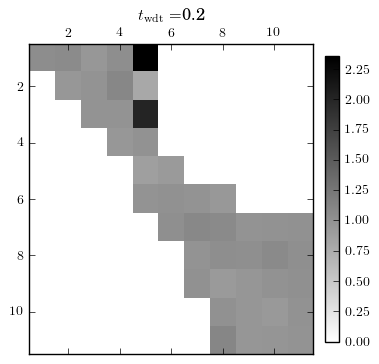

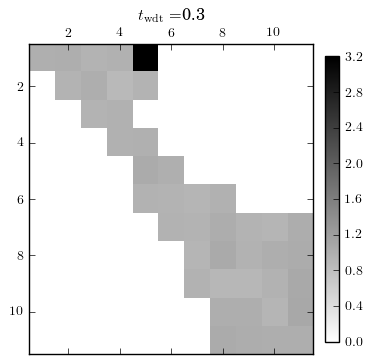

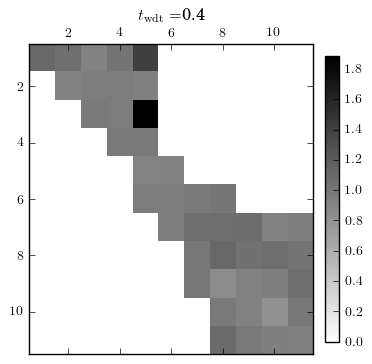

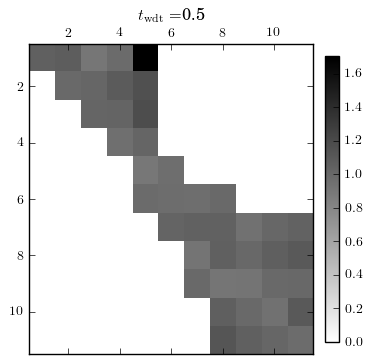

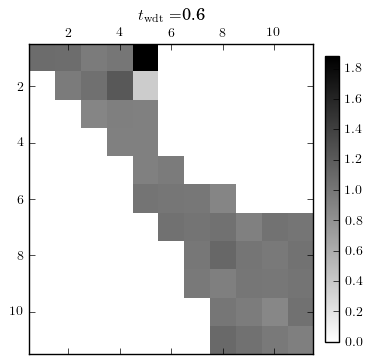

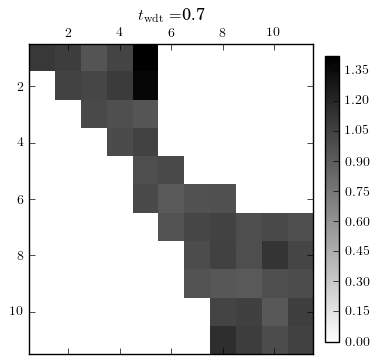

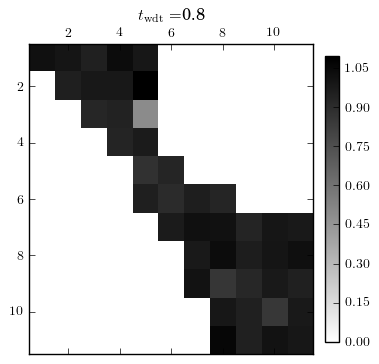

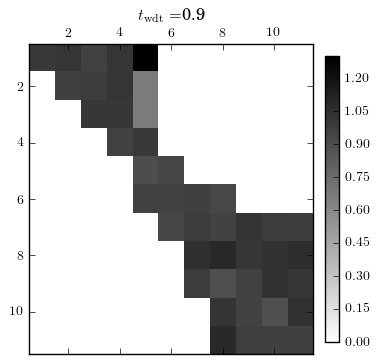

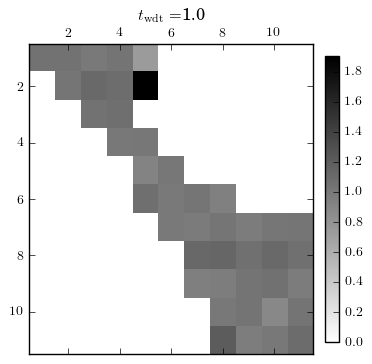

In [64]:
v_base = np.zeros((121,1))


for i in range(1,122):
        v_base[i-1] = homog_comp.data[0].get_avg('INF_SP0',i,20)

for j in range(1,10):
    names = []
    foms =  []
    filename = 'homog_inf_sp0_t' + str(j)
    v = np.zeros((121,1))
    
    for i in range(1,122):
        val = homog_comp.data[j].get_avg('INF_SP0',i,20)
        if v_base[i-1] != 0:
            v[i-1] = val/v_base[i-1]
        elif val != 0:
            print 'Group: ' + str(i) + ' FOM:' + str(val)
            name = '(' + str(int(np.mod(i-1,11) +1)) + '$\\to$' + str(int(np.ceil(i/11.0))) + ')'
            names.append(name)
            foms.append(val)
    v.shape = (11,11)
    im = plt.matshow(v, cmap='gray_r', extent = [.5,11.5,11.5,.5], aspect='auto')
    cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
    cbar.solids.set_edgecolor("face")
    plt.draw()
    plt.title('$t_{\mathrm{wdt}} = $' + homog_comp.data[j].name)
    file_name = 'homog_sp0_matshow_' + str(j)
    plt.savefig("/home/josh/repos/masters_thesis/images/results/matshows/" + file_name + ".pdf",
           format = 'pdf', bbox_inches='tight')
    if len(names) > 0:
        d = {'Entry': names, '$\\overline{\\mathrm{FOM}}$' : foms}
        df = pd.DataFrame(d)
        cols = df.columns.tolist()
        cols = [cols[1], cols[0]]
        df = df[cols]
        df
        def fom(x):
            return re.sub('e(-*)?\\+?0?(\\d\\d?)','$\\\\times 10^{\\1\\2}$','{:.6e}'.format(x))
        def ratio(x):
            return '{:.6f}'.format(x)
        def twdt(x):
            return x
        with open("/home/josh/repos/masters_thesis/include/tables/homog/matshows/"+ file_name,'w') as f:
            f.write(df.to_latex(formatters=[twdt,fom,ratio], index = False, escape = False))

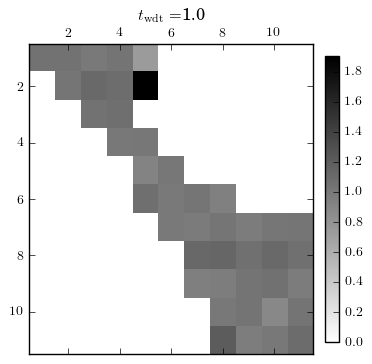

In [63]:
im = plt.matshow(v, cmap='gray_r', extent = [.5,11.5,11.5,.5], aspect='auto')
cbar = plt.colorbar(im,fraction=0.046, pad=0.04)
cbar.solids.set_edgecolor("face")
plt.draw()
plt.title('$t_{\mathrm{wdt}} = $' + homog_comp.data[j].name)